In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [59]:
#Lectura del CSV bike_train

df = pd.read_excel('bike_train.xlsx')

Análisis exploratorio de los datos

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [61]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


Chequeo si hay valores nulos

In [62]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [63]:
df.instant.nunique()

11999

In [64]:
df.dteday.nunique()

506

In [65]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [66]:
df.yr.unique()

array([0, 1], dtype=int64)

In [67]:
df.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [68]:
df.hr.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [69]:
df.holiday.unique()

array([0, 1], dtype=int64)

In [70]:
df.weekday.unique()  #el día 0 es domingo, el día 6 es sábado

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [71]:
df.workingday.unique()

array([0, 1], dtype=int64)

In [72]:
df.weathersit.unique()

array([1, 2, 3, 4], dtype=int64)

Cargo y describo el dataset bike_test.xlsx en busca de diferencias. Vemos que no tiene las columnas cnt, registered, casual y dteday.

In [73]:
bike_test = pd.read_excel('bike_test.xlsx')
bike_test.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,5380.000000,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,14689.500000,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,0.566758,0.535741,0.630483,0.175968
std,1553.216555,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,0.182800,0.161300,0.174493,0.113988
min,12000.000000,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.140000,0.151500,0.160000,0.000000
25%,13344.750000,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,0.400000,0.409100,0.490000,0.104500
50%,14689.500000,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,0.600000,0.575800,0.640000,0.164200
75%,16034.250000,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,0.700000,0.666700,0.780000,0.253700
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,1.000000,0.924200,1.000000,0.656700


Investigo las correlaciones de cada feature con el target CNT y lo muestro gráficamente. Elimino las features que no se encuentran en el dataset bike_test.xlsx

In [74]:
correlaciones=df.corr().loc["cnt"]
correlaciones.drop(["cnt", "registered", "casual"], axis=0, inplace=True)

[Text(0.5, 1.0, 'Correlaciones entre los features y la variable target CNT')]

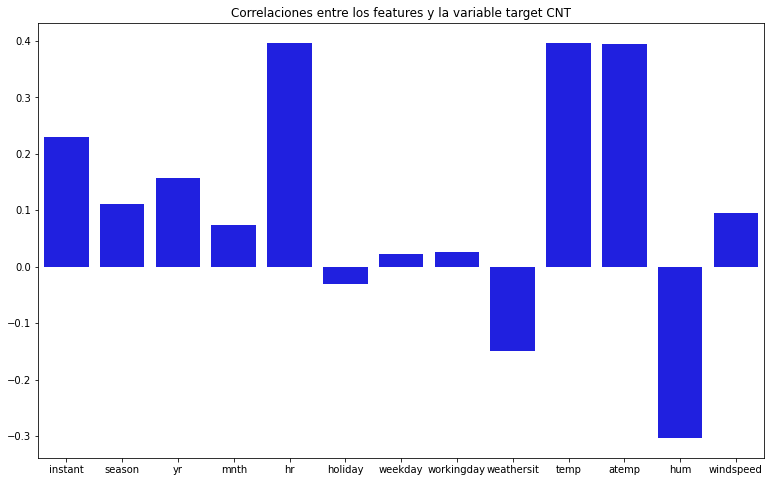

In [75]:
plt.figure(figsize=[13,8])
sns.barplot(x=correlaciones.index, y=correlaciones.values, color="blue").set(
    title="Correlaciones entre los features y la variable target CNT")

In [76]:
correlaciones.sort_values(ascending=False, inplace=True)
correlaciones_abs=abs(correlaciones)
correlaciones_abs.sort_values(ascending=False, inplace=True)

[Text(0.5, 1.0, 'Correlaciones en valores absolutos ordenadas de mayor a menor')]

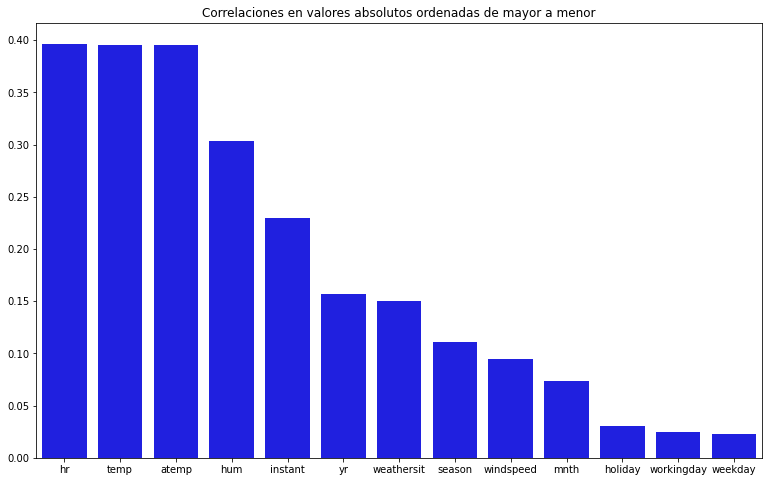

In [77]:
plt.figure(figsize=[13,8])
sns.barplot(x=correlaciones_abs.index, y=correlaciones_abs.values, color="blue").set(
    title="Correlaciones en valores absolutos ordenadas de mayor a menor")

Busco si hay una correlación fuerte entre las variables temp y atemp, la respuesta es que sí, están un 99% correlacionados, por lo tanto sólo utilizaré una de las dos en el modelo.

In [78]:
df.corr().loc["temp"]["atemp"]

0.9917845289428668

En base a lo observado, en primera instancia realizaré un modelo de regresión utilizando un Decision Tree teniendo en cuenta las siguientes features:

(números en valores absolutos)

Hr: correlación de 0.40  
Temp: Correlación de 0.40  
Hum: Correlación de 0.30
Yr: Correlación de 0.16  
Weathersit: Correlación de 0.15  
Season: Correlación de 0.11  

Por lo pronto, no utilizaré más features, ya que los valores restantes son muy bajos.

Aclaraciones: 

-Utilizo temp en lugar de atemp, ya que entre sí tienen una correlación de 0.99, por lo que es incorrecto usar ambas.   
-Descarto la variable instant porque es sólo un número índice que crece, podría interpretarse como un proxy de la fecha pero de todas formas me parece incorrecto usarla.




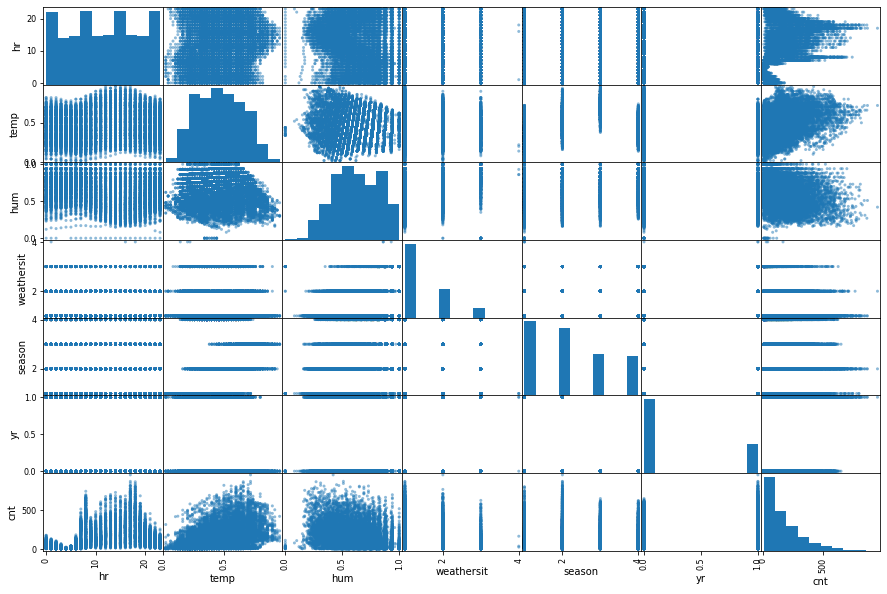

In [79]:
#Grafico la relación entre las variables mencionadas

pd.plotting.scatter_matrix(df[['hr', 'temp', 'hum', 'weathersit', 'season', 'yr', 'cnt']],figsize = (15,10))
plt.show()

Se observa que CNT tiene un comportamiento estacional respecto a la hora, presentando una actividad mayor en horario laboral, de 8 a 18 hs. Por otra parte, las features weathersit, season y yr son categóricas, y por eso en las gráficas que las relacionan con CNT pueden observarse lineas verticales.